In [1]:
import xml.etree.ElementTree as ET
import pandas as pd
import os
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
import cv2
from matplotlib.patches import Rectangle

In [2]:
df = pd.DataFrame(columns=['word_id', 'text', 'x', 'y', 'width', 'height' ])

path = 'train/'
for file in os.listdir(path):
    if(str(file)[-3:] == 'xml'):
        tree = ET.parse(str(os.path.join(path, file)))
        root = tree.getroot() 
        for line in root.findall('lines'):
            for word in line.findall('words'):
                word_id = word.find('word-id').text
                text = word.find('text').text
                x = int(word.find('x').text)
                y = int(word.find('y').text)
                width = int(word.find('width').text)
                height = int(word.find('height').text)
                d = {'word_id': word_id, 'text': text, 'x': x, 'y': y, 'width': width, 'height': height}
                df = df.append(d, ignore_index=True)

df.head()

,word_id,text,x,y,width,height
0,HIN_H_IH_0031_00_00,﻿सर्वज्ञात,38,184,57,30
1,HIN_H_IH_0031_00_01,है,95,187,19,23
2,HIN_H_IH_0031_00_02,कि,121,187,22,25
3,HIN_H_IH_0031_00_03,1857,146,191,40,20
4,HIN_H_IH_0031_00_04,के,192,186,26,27


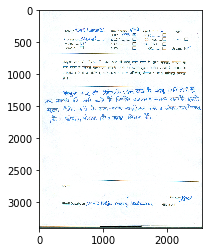

In [6]:
img = imread(path + word + '.png')
plt.imshow(img)

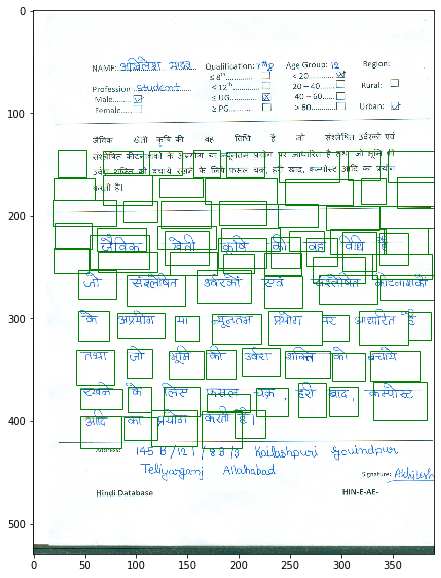

In [219]:
word = 'HIN_E_AE_0000'

img = imread(path + word + '.png')

f_x = 6.1
f_y = 6.1

img = cv2.resize(img, None, fx = 1./f_x, fy = 1./f_y)

plt.figure(figsize=(10,10))
plt.imshow(img)

current_axis = plt.gca()

for i in range(len(df)):
    if df['word_id'][i][:-6] == word:
        #print(df['word_id'][i])
        #label = df['text'][i].strip()
        current_axis.add_patch(Rectangle((df['x'][i], df['y'][i]),
                                         df['width'][i], df['height'][i],
                                         edgecolor = 'g', fill=False, linewidth=1)) 
        #current_axis.text(df['x'][i]*shift_factor, df['y'][i]*shift_factor,
                          #label, size='x-small', color='white', bbox={'facecolor':'red', 'alpha':0.5})
    
plt.show()

In [217]:
i = 0
while i < len(df):
    filetype = word[:5]
    if filetype not in os.listdir(path):
        os.mkdir(os.path.join(path,filetype))
    if(df['word_id'][i][:-6] == word):
        j = i
        while(j < len(df) and df['word_id'][j][:5] == filetype and df['word_id'][j][:-6] == word):
            filename = df['word_id'][j][:13]
            img = cv2.imread(path + word + '.png')
            img = cv2.resize(img, None, fx = 1./f_x, fy = 1./f_y)
            os.mkdir(path + str(filetype) + '/' + str(filename))
            k = j
            while(k < len(df) and df['word_id'][k][:13] == filename and df['word_id'][k][:-6] == word):
                #print (df['word_id'])
                cv2.imwrite(path + str(filetype) + '/' + str(filename) + '/' + df['word_id'][k] + '.png',
                  img[df['y'][k]: (df['y'][k] + df['height'][k]), df['x'][k]: (df['x'][k] + df['width'][k])])
                k+=1
            j+=k
        i+=j-1
    i+=1